In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Exploratory Data Analysis\Cardio EDA\cardiovascular-disease-eda\dataset\health_data.csv")

# Clean the data
df_cleaned = df.drop(columns=["Unnamed: 0", "id"]).copy()
df_cleaned["age_years"] = (df_cleaned["age"] / 365).astype(int)
df_cleaned.drop(columns=["age"], inplace=True)

# Remove obvious outliers
df_cleaned = df_cleaned[
    (df_cleaned["ap_hi"] > 50) & (df_cleaned["ap_hi"] < 250) &
    (df_cleaned["ap_lo"] > 30) & (df_cleaned["ap_lo"] < 200) &
    (df_cleaned["height"] > 100) & (df_cleaned["height"] < 250) &
    (df_cleaned["weight"] > 30) & (df_cleaned["weight"] < 200)
]

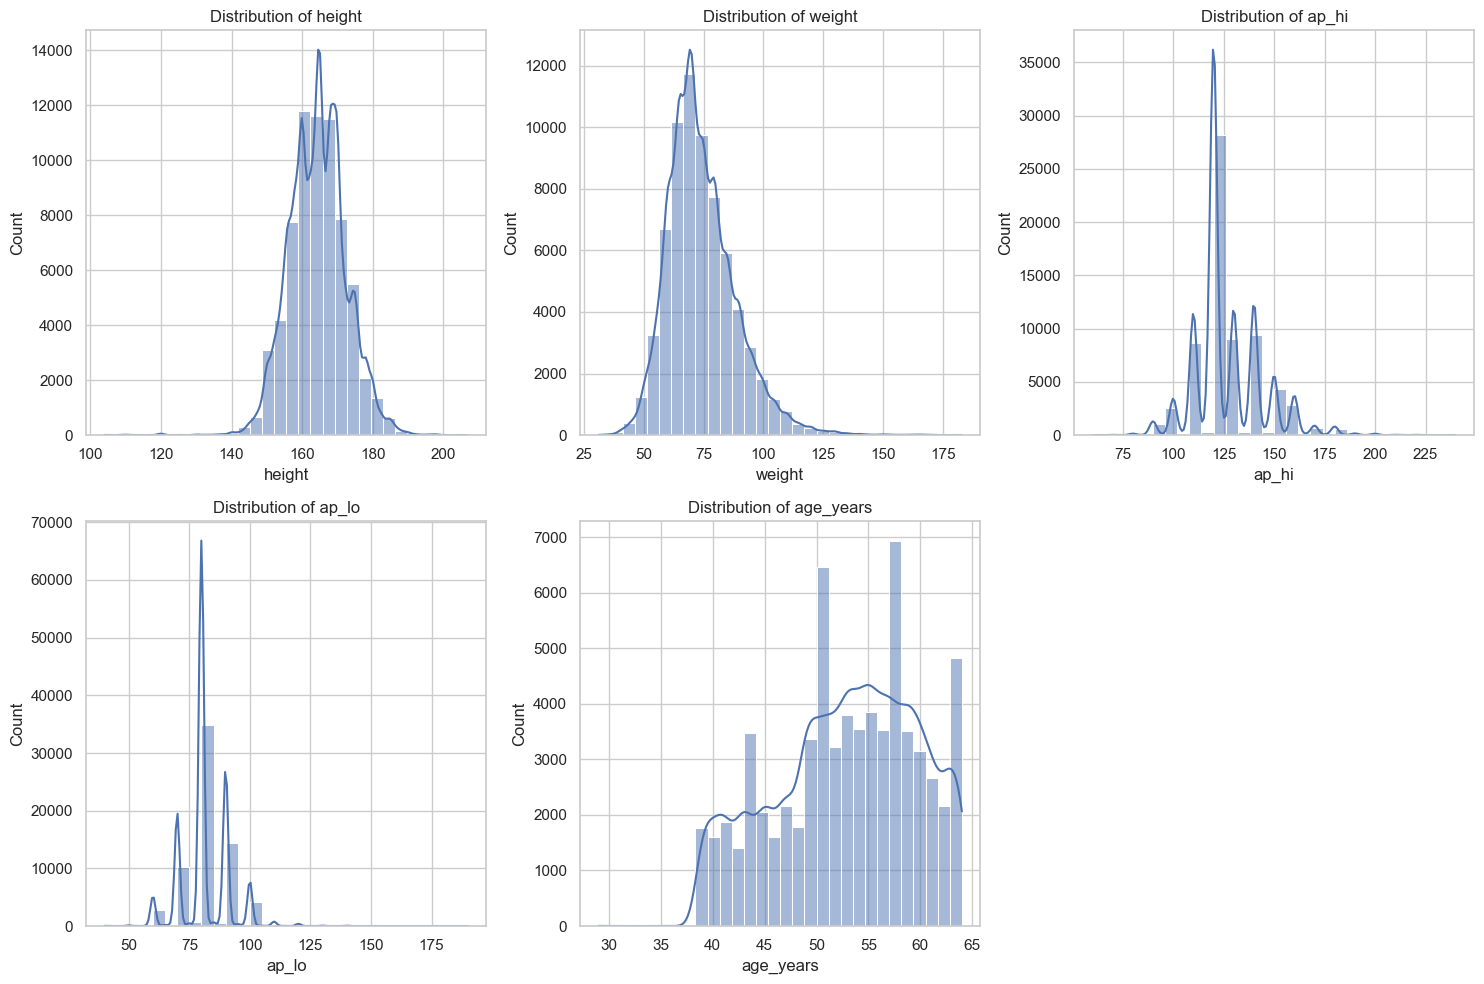

In [5]:
numerical_features = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

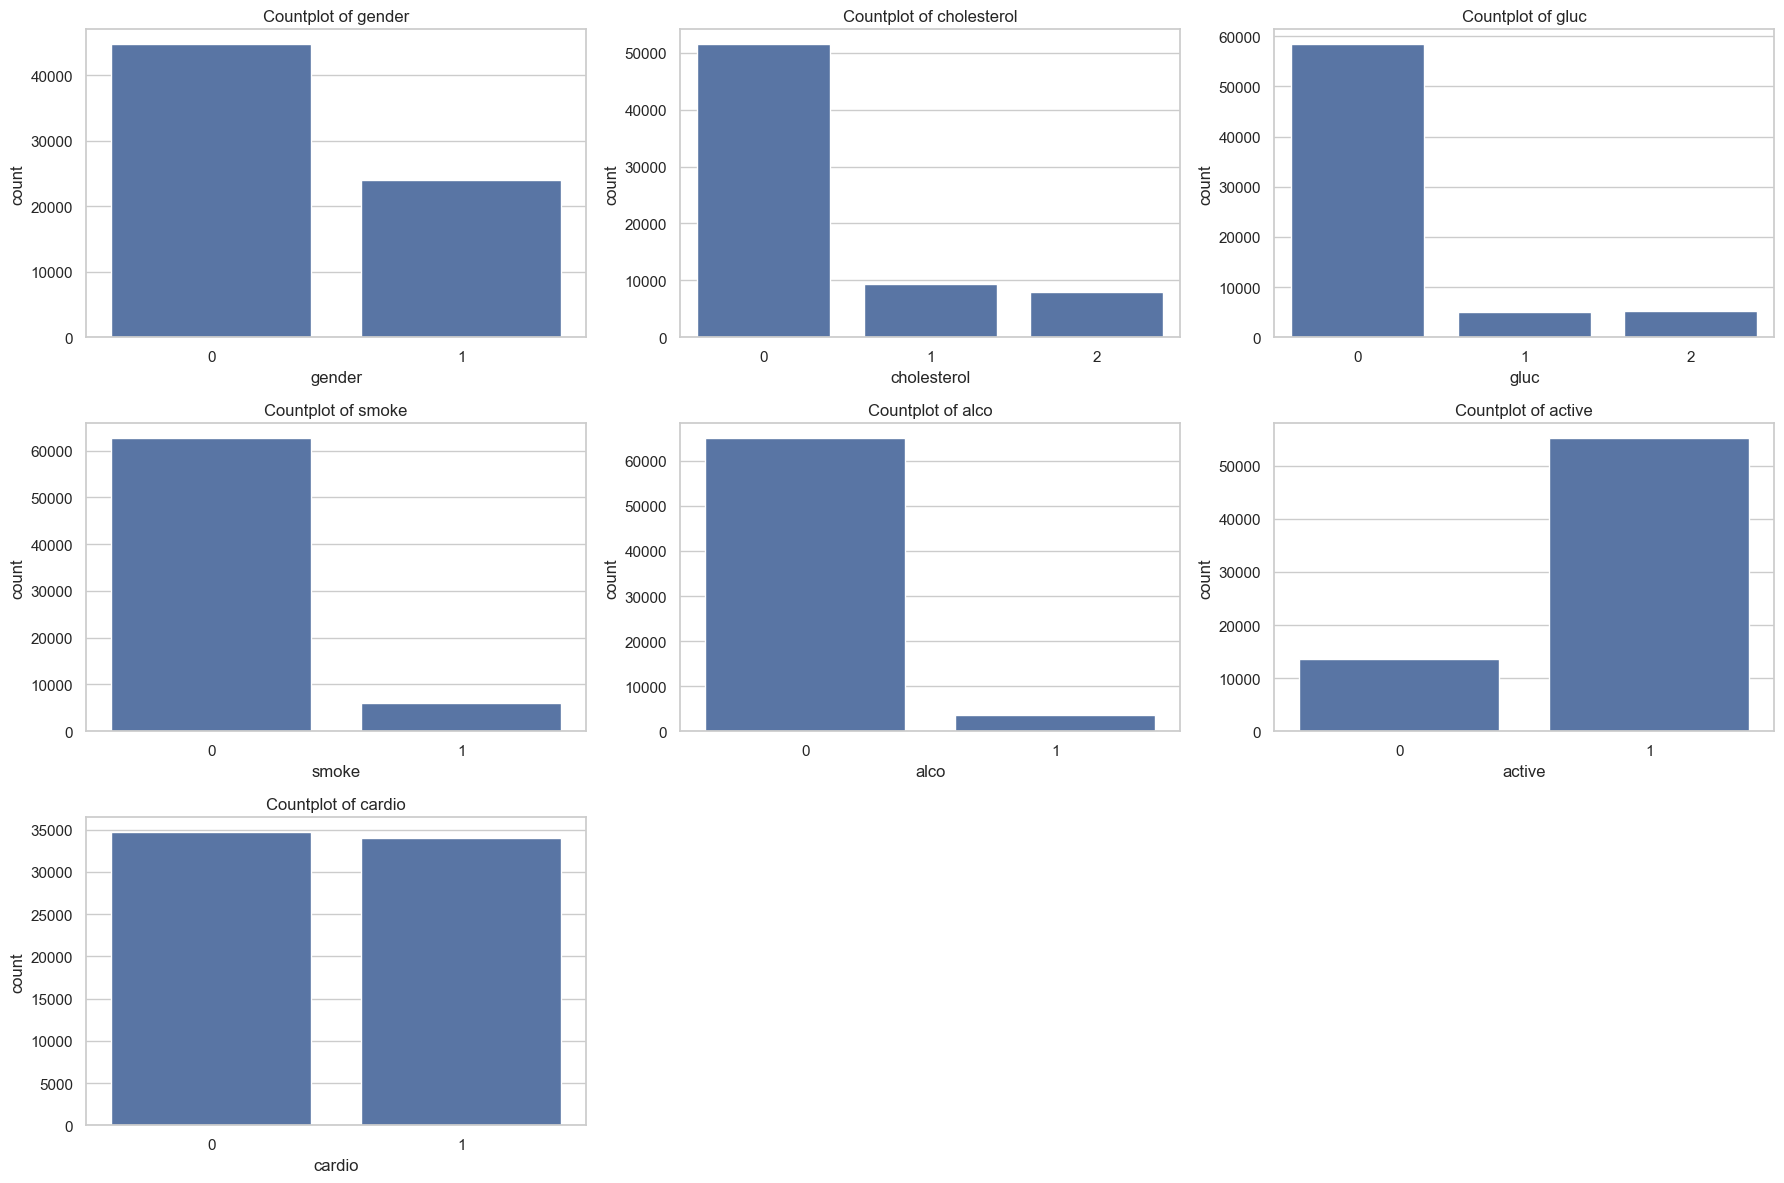

In [6]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df_cleaned)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

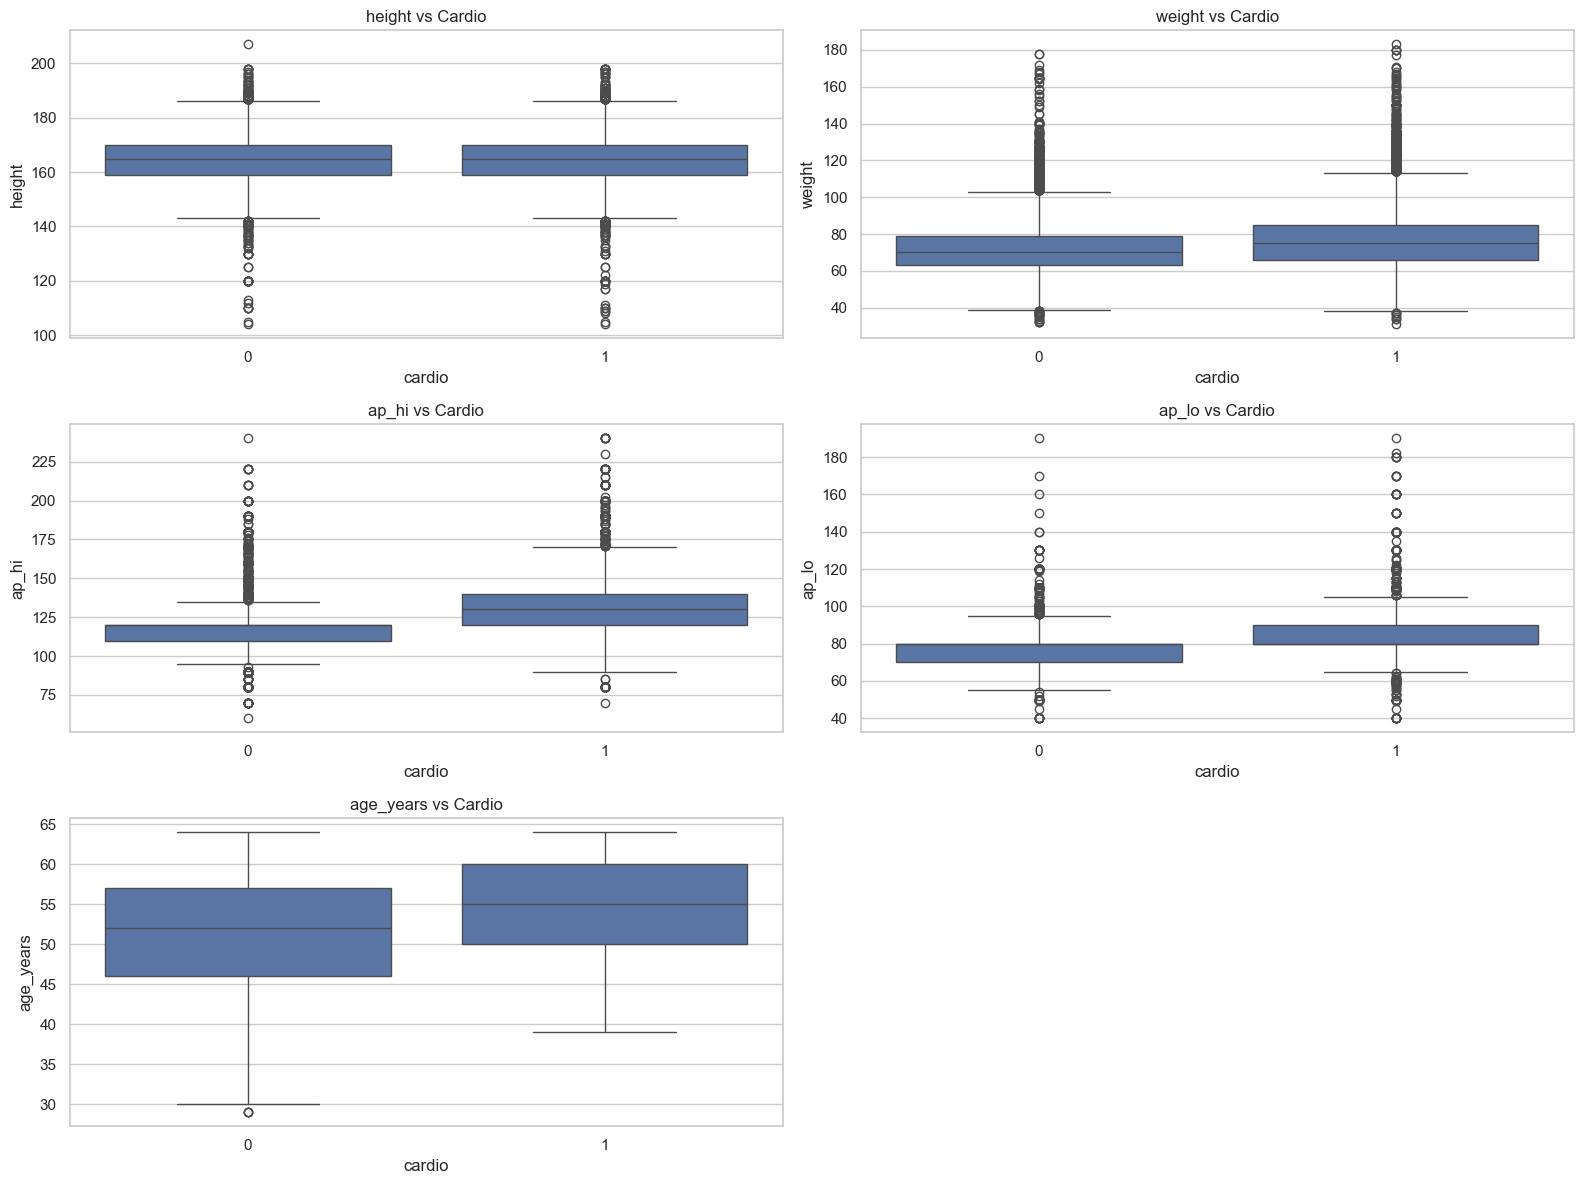

In [7]:
numeric = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='cardio', y=col, data=df_cleaned)
    plt.title(f'{col} vs Cardio')
plt.tight_layout()
plt.show()

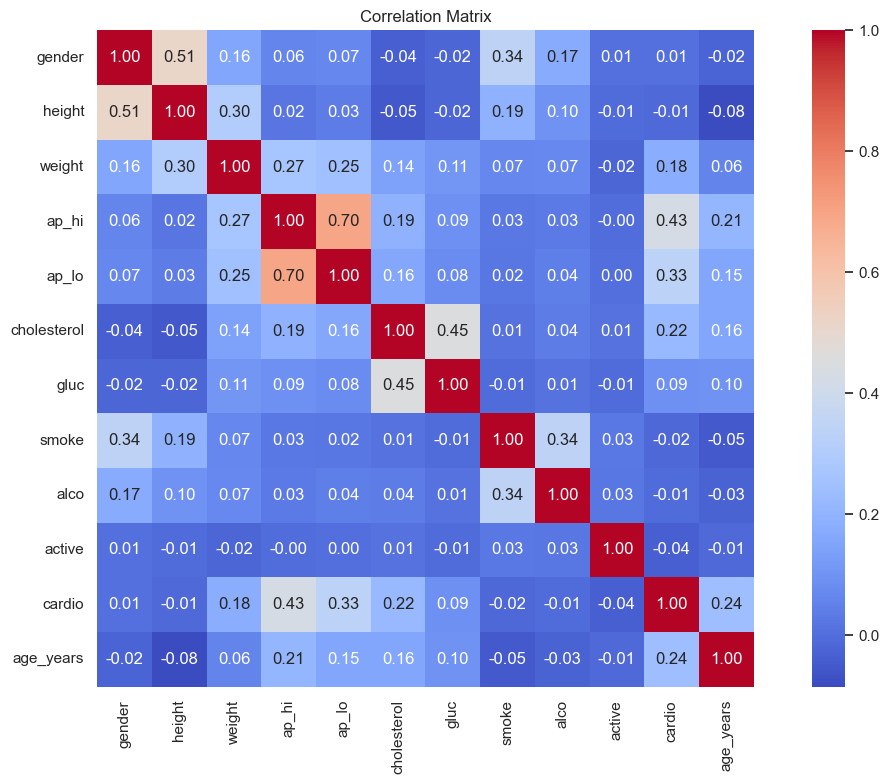

In [8]:
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()